In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [26]:
def pfcm(data, c, expo=2, max_iter=1000, min_impro=0.005, a=1, b=4, nc=3):
    obj_fcn = np.zeros(shape=(max_iter, 1))
    ni = np.zeros(shape=(c, data.shape[0]))
    U = initf(c, data.shape[0])
    T = initf(c, data.shape[0])
    cntr = np.random.uniform(low=np.min(data), high=np.max(data), size=(
        c, data.shape[1]))
    for i in range(max_iter):
        current_cntr = cntr
        U, T, cntr, obj_fcn[i], ni = pstepfcm(
                data, cntr, U, T, expo, a, b, nc, ni)
        if i > 1:
            if abs(obj_fcn[i] - obj_fcn[i-1]) < min_impro:
                break
            elif np.max(abs(cntr - current_cntr)) < min_impro:
                break
    return cntr, U, T, obj_fcn

In [27]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

In [28]:
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

In [29]:
cntr, U, T, obj_fcn = pfcm(X, 3)

No handles with labels found to put in legend.


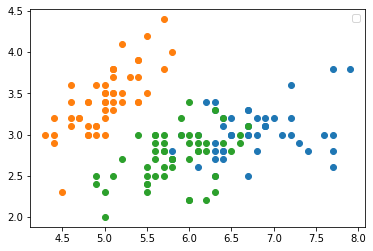

In [37]:
fig2, ax2 = plt.subplots()
for j in range(3):
    ax2.plot(X.T[0, np.argmax(U, axis=0) == j],
             X.T[1, np.argmax(U, axis=0) == j], 'o',
             )
ax2.legend()